In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('gold_price_data.csv', index_col='timestamp', parse_dates=True)

In [3]:
df.head()

,open,high,low,close,volume,close_time,quote_volume,trades,taker_buy_base,taker_buy_quote,ignore
timestamp,,,,,,,,,,,
2025-05-20 00:00:00,3235.73,3244.54,3219.00,3226.31,1311.9681,2025-05-20 03:59:59.999,4.233167e+06,7938,355.0432,1.145826e+06,0
2025-05-20 04:00:00,3226.62,3242.08,3225.05,3240.52,460.0097,2025-05-20 07:59:59.999,1.487133e+06,3947,309.7109,1.001425e+06,0
2025-05-20 08:00:00,3240.52,3262.04,3235.34,3261.34,1109.4755,2025-05-20 11:59:59.999,3.607010e+06,6522,697.8601,2.268329e+06,0
2025-05-20 12:00:00,3261.25,3299.99,3250.98,3291.00,1341.3397,2025-05-20 15:59:59.999,4.405279e+06,9752,685.9914,2.252615e+06,0
2025-05-20 16:00:00,3290.82,3305.75,3289.14,3304.27,1222.2008,2025-05-20 19:59:59.999,4.033427e+06,10697,568.7942,1.877124e+06,0


In [4]:
features_df = df[['open', 'high', 'low', 'close', 'volume']].copy()

In [5]:
print("\n1. Basic Price Features:")
features_df['price_change'] = features_df['close'].diff()
features_df['price_change_pct'] = features_df['close'].pct_change() * 100
features_df['high_low_spread'] = features_df['high'] - features_df['low']
features_df['open_close_spread'] = features_df['close'] - features_df['open']
print("   ✓ Price changes and spreads")


1. Basic Price Features:
   ✓ Price changes and spreads


In [7]:
print("\n2. Moving Averages:")
features_df['MA_7'] = features_df['close'].rolling(window=7).mean()
features_df['MA_14'] = features_df['close'].rolling(window=14).mean()
features_df['MA_21'] = features_df['close'].rolling(window=21).mean()
features_df['MA_50'] = features_df['close'].rolling(window=50).mean()
features_df['MA_90'] = features_df['close'].rolling(window=90).mean()
features_df['MA_200'] = features_df['close'].rolling(window=200).mean()
print("   ✓ 7, 14, 21, 50, 90, 200-day moving averages")


2. Moving Averages:
   ✓ 7, 14, 21, 50, 90, 200-day moving averages


In [10]:
print("\n3. Exponential Moving Averages:")
features_df['EMA_12'] = features_df['close'].ewm(span=12, adjust=False).mean()
features_df['EMA_26'] = features_df['close'].ewm(span=26, adjust=False).mean()
features_df['EMA_90'] = features_df['close'].ewm(span=90, adjust=False).mean()
features_df['EMA_200'] = features_df['close'].ewm(span=200, adjust=False).mean()
print("   ✓ 12, 26, 90, 200-day EMAs")


3. Exponential Moving Averages:
   ✓ 12, 26, 90, 200-day EMAs


In [11]:
print("\n4. Volatility Indicators:")
features_df['volatility_7'] = features_df['close'].rolling(window=7).std()
features_df['volatility_21'] = features_df['close'].rolling(window=21).std()
print("   ✓ 7, 21-day volatility (standard deviation)")


4. Volatility Indicators:
   ✓ 7, 21-day volatility (standard deviation)


In [12]:
print("\n5. RSI (Relative Strength Index):")
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

features_df['RSI_14'] = calculate_rsi(features_df['close'], 14)
print("   ✓ 14-day RSI calculated")


5. RSI (Relative Strength Index):
   ✓ 14-day RSI calculated


In [13]:
print("\n6. MACD:")
features_df['MACD'] = features_df['EMA_12'] - features_df['EMA_26']
features_df['MACD_signal'] = features_df['MACD'].ewm(span=9, adjust=False).mean()
features_df['MACD_diff'] = features_df['MACD'] - features_df['MACD_signal']
print("   ✓ MACD, Signal line, and Histogram")


6. MACD:
   ✓ MACD, Signal line, and Histogram


In [14]:
print("\n7. Bollinger Bands:")
features_df['BB_middle'] = features_df['close'].rolling(window=20).mean()
features_df['BB_std'] = features_df['close'].rolling(window=20).std()
features_df['BB_upper'] = features_df['BB_middle'] + (features_df['BB_std'] * 2)
features_df['BB_lower'] = features_df['BB_middle'] - (features_df['BB_std'] * 2)
features_df['BB_width'] = features_df['BB_upper'] - features_df['BB_lower']
features_df['BB_position'] = (features_df['close'] - features_df['BB_lower']) / features_df['BB_width']
print("   ✓ Upper, Middle, Lower bands and position")


7. Bollinger Bands:
   ✓ Upper, Middle, Lower bands and position


In [15]:
print("\n8. Lag Features (Historical prices):")
for lag in [1, 2, 3, 7, 14]:
    features_df[f'close_lag_{lag}'] = features_df['close'].shift(lag)
    features_df[f'volume_lag_{lag}'] = features_df['volume'].shift(lag)
print("   ✓ 1, 2, 3, 7, 14-day lag features")


8. Lag Features (Historical prices):
   ✓ 1, 2, 3, 7, 14-day lag features


In [16]:
print("\n9. Rolling Statistics:")
features_df['rolling_min_7'] = features_df['close'].rolling(window=7).min()
features_df['rolling_max_7'] = features_df['close'].rolling(window=7).max()
features_df['rolling_mean_7'] = features_df['close'].rolling(window=7).mean()
print("   ✓ 7-day min, max, mean")


9. Rolling Statistics:
   ✓ 7-day min, max, mean


In [17]:
print("\n10. Target Variable:")
features_df['target'] = features_df['close'].shift(-1)  # Next day's closing price
print("   ✓ Next day's closing price (our prediction target)")


10. Target Variable:
   ✓ Next day's closing price (our prediction target)


In [18]:
print(f"\nRows before cleaning: {len(features_df)}")
features_df.dropna(inplace=True)
print(f"Rows after cleaning: {len(features_df)}")
print(f"Rows removed: {len(df) - len(features_df)} (due to rolling window calculations)")


Rows before cleaning: 1082
Rows after cleaning: 882
Rows removed: 200 (due to rolling window calculations)


In [19]:
features_df.to_csv('gold_features.csv')
print("\n✓ Features saved to 'gold_features.csv'")



✓ Features saved to 'gold_features.csv'


In [23]:
print("\n" + "="*60)
print("SAMPLE OF FEATURES (Last 5 rows)")
print("="*60)
sample_cols = ['close', 'MA_7', 'MA_21', 'RSI_14', 'MACD', 'volatility_7', 'target']
print(features_df[sample_cols].tail())


SAMPLE OF FEATURES (Last 5 rows)
                       close         MA_7        MA_21     RSI_14      MACD  \
timestamp                                                                     
2025-11-15 08:00:00  4074.28  4083.244286  4140.095238  26.935340 -4.976727   
2025-11-15 12:00:00  4094.83  4079.577143  4139.654286  29.663074 -5.664331   
2025-11-15 16:00:00  4087.17  4080.592857  4138.811905  25.593313 -6.749557   
2025-11-15 20:00:00  4093.95  4083.048571  4137.803333  31.394876 -6.982031   
2025-11-16 00:00:00  4102.38  4086.998571  4134.577143  39.350214 -6.412124   

                     volatility_7   target  
timestamp                                   
2025-11-15 08:00:00     16.574399  4094.83  
2025-11-15 12:00:00      7.075417  4087.17  
2025-11-15 16:00:00      7.643796  4093.95  
2025-11-15 20:00:00      8.870123  4102.38  
2025-11-16 00:00:00     10.546425  4101.17  


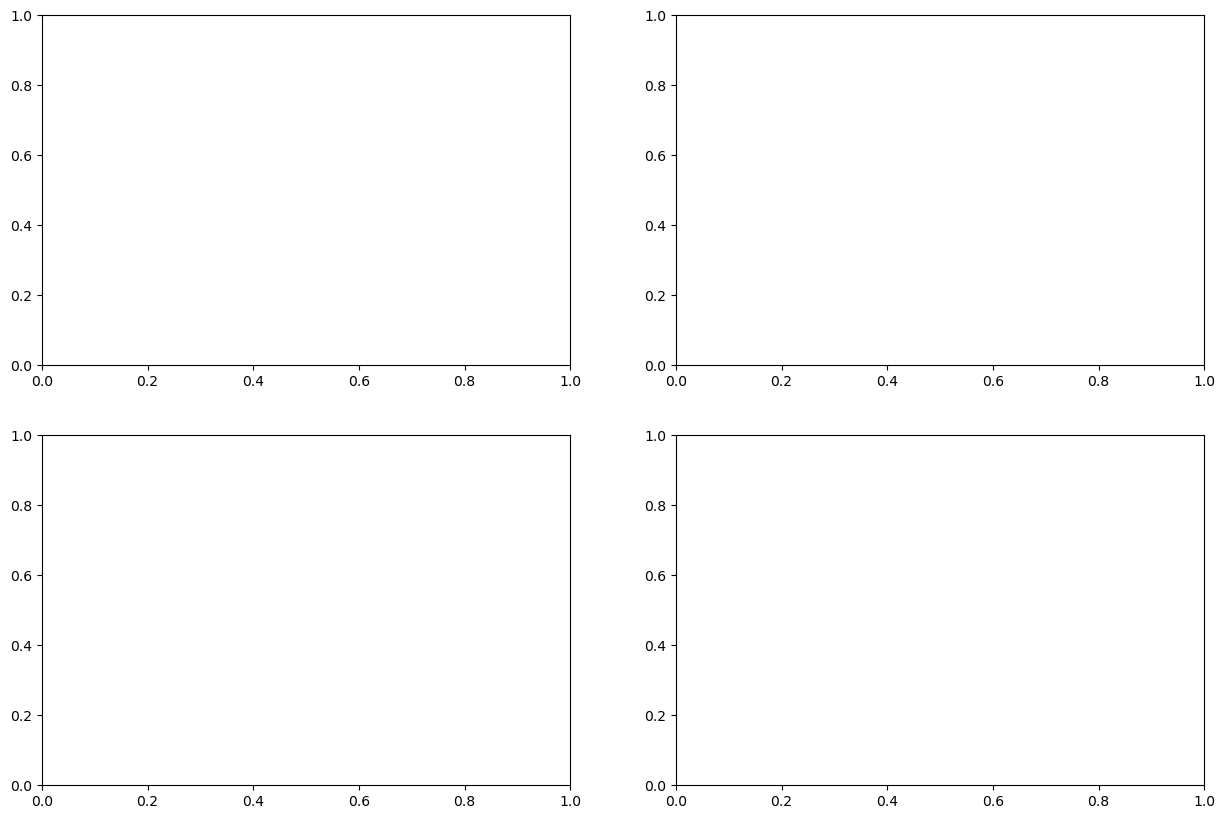

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

In [25]:
axes[0, 0].plot(features_df.index, features_df['close'], label='Close Price', linewidth=2)
axes[0, 0].plot(features_df.index, features_df['MA_7'], label='7-day MA', alpha=0.7)
axes[0, 0].plot(features_df.index, features_df['MA_21'], label='21-day MA', alpha=0.7)
axes[0, 0].set_title('Price with Moving Averages', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

In [26]:
axes[0, 1].plot(features_df.index, features_df['RSI_14'], color='purple', linewidth=2)
axes[0, 1].axhline(y=70, color='r', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[0, 1].axhline(y=30, color='g', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[0, 1].fill_between(features_df.index, 30, 70, alpha=0.1, color='gray')
axes[0, 1].set_title('RSI (Relative Strength Index)', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

In [27]:
axes[1, 0].plot(features_df.index, features_df['MACD'], label='MACD', linewidth=2)
axes[1, 0].plot(features_df.index, features_df['MACD_signal'], label='Signal', linewidth=2)
axes[1, 0].bar(features_df.index, features_df['MACD_diff'], label='Histogram', alpha=0.3)
axes[1, 0].set_title('MACD', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

In [28]:
axes[1, 1].plot(features_df.index, features_df['close'], label='Close Price', linewidth=2)
axes[1, 1].plot(features_df.index, features_df['BB_upper'], 'r--', alpha=0.7, label='Upper Band')
axes[1, 1].plot(features_df.index, features_df['BB_middle'], 'b--', alpha=0.7, label='Middle Band')
axes[1, 1].plot(features_df.index, features_df['BB_lower'], 'g--', alpha=0.7, label='Lower Band')
axes[1, 1].fill_between(features_df.index, features_df['BB_lower'], features_df['BB_upper'], alpha=0.1)
axes[1, 1].set_title('Bollinger Bands', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

In [29]:
plt.savefig('gold_features_visualization.png', dpi=300, bbox_inches='tight')
print("\n✓ Feature visualization saved as 'gold_features_visualization.png'")
plt.show()


✓ Feature visualization saved as 'gold_features_visualization.png'


<Figure size 640x480 with 0 Axes>